In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import math
import sklearn
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [2]:
train = pd.read_csv('train3.csv')
test = pd.read_csv('test3.csv')

In [3]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train.shape

(8693, 14)

In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
#отобразит статистики объектного типа
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
train.drop_duplicates()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [10]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
#УДАЛЯЕМ СТОЛБЦЫ PassengerId И Name
delete_cols = ['PassengerId', 'Name']
for column in delete_cols:
    train = train.loc[:, train.columns != column]

In [12]:
train.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [13]:
# ЗАМЕНЯЕМ ЧИСЛОВЫМИ ЗНАЧЕНИЯМИ VIP, CryoSleep, HomePlanet
train['VIP'] = train['VIP'].replace({True: 1, False: 0})
train['CryoSleep'] = train['CryoSleep'].replace({True: 1, False: 0})
train['HomePlanet'] = train['HomePlanet'].replace({'Earth': 1, 'Europa': 2,'Mars': 3})
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2.0,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,1.0,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True
2,2.0,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False
3,2.0,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False
4,1.0,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2.0,0.0,A/98/P,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,1.0,1.0,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,False
8690,1.0,0.0,G/1500/S,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,True
8691,2.0,0.0,E/608/S,55 Cancri e,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,False


In [14]:
# ИСПОЛЬЗУЕМ LABEL ENCODING ДЛЯ СТОЛБЦА Destination
label_encoder = LabelEncoder()
categ = ['Destination']
train[categ] = train[categ].apply(label_encoder.fit_transform)
train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,2.0,0.0,B/0/P,2,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,1.0,0.0,F/0/S,2,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True
2,2.0,0.0,A/0/S,2,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False
3,2.0,0.0,A/0/S,2,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False
4,1.0,0.0,F/1/S,2,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2.0,0.0,A/98/P,0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,1.0,1.0,G/1499/S,1,18.0,0.0,0.0,0.0,0.0,0.0,0.0,False
8690,1.0,0.0,G/1500/S,2,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,True
8691,2.0,0.0,E/608/S,0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,False


In [15]:
# ФОРМИРУЕМ НОВЫЕ СТОЛБЦЫ НА ОСНОВАНИИ Cabin // пропущенные заполняются 0
train['Cabin'].fillna('Unknown', inplace=True)
train['letter1'] = train['Cabin'].str[0]
train['letter2'] = train['Cabin'].str[-1]

train['letter1'].replace('1', np.nan, inplace=True)
train['letter2'].replace('3', np.nan, inplace=True)
train.drop('Cabin', axis=1, inplace=True)

cols_to_label = ['letter1', 'letter2']
def one_hot_encode(df, col):
    return pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1).drop(col, axis=1)
for col in cols_to_label:
    train = one_hot_encode(train, col)

train = train.replace({True: 1, False: 0})
print(train.head())

   HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0         2.0        0.0            2  39.0  0.0          0.0        0.0   
1         1.0        0.0            2  24.0  0.0        109.0        9.0   
2         2.0        0.0            2  58.0  1.0         43.0     3576.0   
3         2.0        0.0            2  33.0  0.0          0.0     1283.0   
4         1.0        0.0            2  16.0  0.0        303.0       70.0   

   ShoppingMall     Spa  VRDeck  ...  letter1_C  letter1_D  letter1_E  \
0           0.0     0.0     0.0  ...          0          0          0   
1          25.0   549.0    44.0  ...          0          0          0   
2           0.0  6715.0    49.0  ...          0          0          0   
3         371.0  3329.0   193.0  ...          0          0          0   
4         151.0   565.0     2.0  ...          0          0          0   

   letter1_F  letter1_G  letter1_T  letter1_U  letter2_P  letter2_S  letter2_n  
0          0          0

In [16]:
corr_matrix = train.corr()
corr_matrix

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,letter1_C,letter1_D,letter1_E,letter1_F,letter1_G,letter1_T,letter1_U,letter2_P,letter2_S,letter2_n
HomePlanet,1.000000,0.088072,0.037513,0.138058,0.127844,0.215963,0.070782,0.103070,0.055232,0.040292,...,0.129026,0.283640,0.108267,0.128954,-0.538069,0.009106,0.006548,-0.001484,-0.000468,0.006548
CryoSleep,0.088072,1.000000,-0.099555,-0.074273,-0.081402,-0.252396,-0.211510,-0.212514,-0.203991,-0.198857,...,0.030447,-0.068608,-0.113267,-0.224790,0.245972,-0.016237,0.025144,-0.022918,0.015423,0.025144
Destination,0.037513,-0.099555,1.000000,-0.004248,-0.046030,0.044733,-0.110659,0.022977,-0.053614,-0.073654,...,-0.133326,-0.000772,0.079444,0.112711,0.028390,0.013843,-0.016053,0.012300,-0.007493,-0.016053
Age,0.138058,-0.074273,-0.004248,1.000000,0.092819,0.068723,0.130421,0.033133,0.123970,0.101007,...,0.127957,0.077988,0.028638,-0.018938,-0.212117,0.013673,0.003390,-0.011880,0.010862,0.003390
VIP,0.127844,-0.081402,-0.046030,0.092819,1.000000,0.058785,0.129799,0.018295,0.061059,0.125974,...,0.066555,0.068180,-0.013362,-0.058120,-0.099889,-0.003761,0.007711,0.008714,-0.011010,0.007711
RoomService,0.215963,-0.252396,0.044733,0.068723,0.058785,1.000000,-0.015889,0.054480,0.010080,-0.019581,...,-0.020310,0.162944,0.044106,0.086898,-0.146530,0.007364,0.026772,0.007583,-0.015591,0.026772
FoodCourt,0.070782,-0.211510,-0.110659,0.130421,0.129799,-0.015889,1.000000,-0.014228,0.221891,0.227995,...,0.262541,0.020183,-0.039740,-0.133150,-0.151747,0.014134,0.000343,-0.019812,0.019700,0.000343
ShoppingMall,0.103070,-0.212514,0.022977,0.033133,0.018295,0.054480,-0.014228,1.000000,0.013879,-0.007322,...,0.000934,0.055252,0.031655,0.074909,-0.109245,-0.006222,-0.010420,0.022192,-0.019041,-0.010420
Spa,0.055232,-0.203991,-0.053614,0.123970,0.061059,0.010080,0.221891,0.013879,1.000000,0.153821,...,0.165828,0.034564,-0.011814,-0.088352,-0.125876,0.036205,0.025807,-0.005801,-0.001964,0.025807
VRDeck,0.040292,-0.198857,-0.073654,0.101007,0.125974,-0.019581,0.227995,-0.007322,0.153821,1.000000,...,0.208311,-0.003495,-0.018676,-0.095165,-0.128630,0.012239,-0.007280,0.009073,-0.006890,-0.007280


<Axes: >

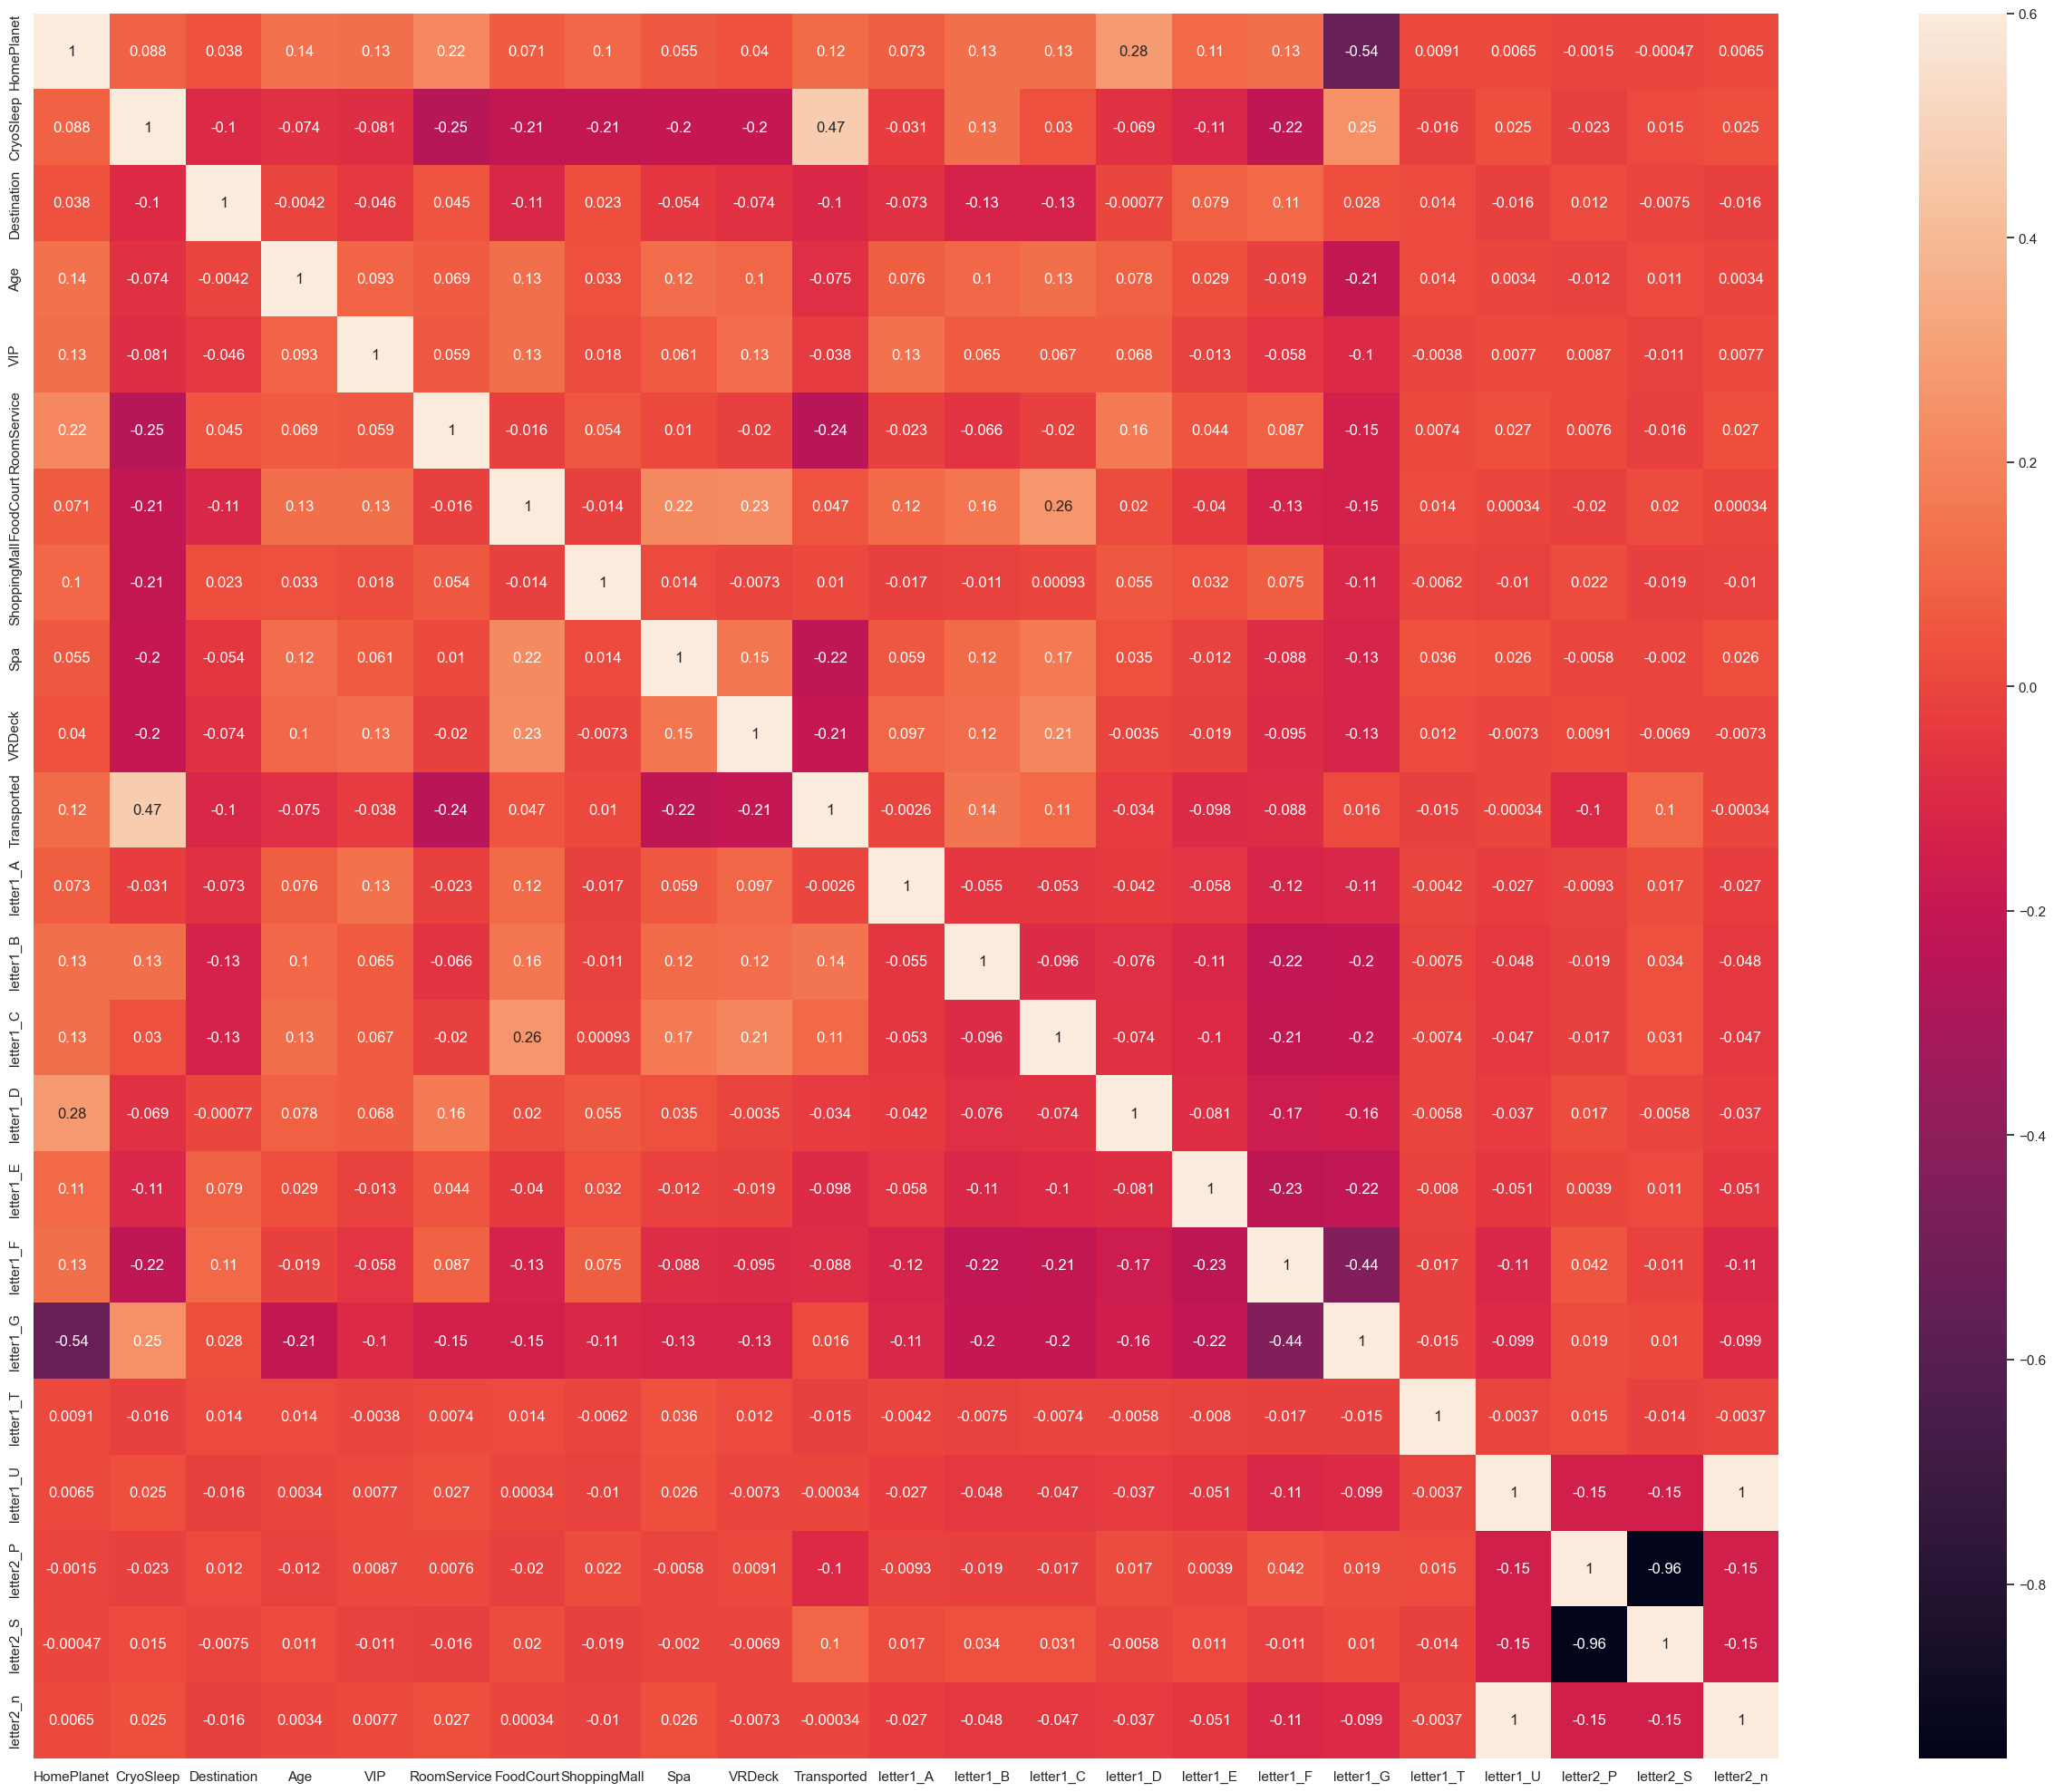

In [17]:
plt.figure(figsize=(40,25))
sns.heatmap(corr_matrix, vmax=0.6, square=True, annot=True)

In [18]:
train.to_csv('train4.csv', index=False)